## bedrock head prediction: regression
### 1. 데이터 전처리
- null 값 삭제
- 지반명 숫자 지정(시각화를 위함)
- 데이터 시각화(3d plotting)
- 크리깅 데이터 전처리(풍화암층, 연암층)

### 2. 학습, 평가
- 학습데이터, 평가데이터 split
- Decision Tree
- xgboost
- Random Forest
- MLP
- SVM

- Stacking : Logistic Regression

### 3. 모델 시각화


### 1. 데이터 전처리
    - null 값 삭제
    - 지반명 숫자 지정
    - 데이터 시각화(3d plotting)

In [1]:
import pandas as pd
import numpy as np

In [2]:
borehole_data=pd.read_csv('선행연구_mlp데이터.csv', encoding='EUC-KR')
display(borehole_data.info())
display(borehole_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8419 entries, 0 to 8418
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8419 non-null   int64  
 1   시추공 코드      8419 non-null   int64  
 2   x 좌표        8419 non-null   float64
 3   y 좌표        8419 non-null   float64
 4   표고          8419 non-null   float64
 5   층의 시작 심도    8419 non-null   float64
 6   층의 종료 심도    8419 non-null   float64
 7   두께          8419 non-null   float64
 8   지하수위        8419 non-null   float64
 9   지반명         8419 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 657.9+ KB


None

,Unnamed: 0,시추공 코드,x 좌표,y 좌표,표고,층의 시작 심도,층의 종료 심도,두께,지하수위,지반명
0,0,5001001,202508.166948,445914.007345,98.30,0.0,5.0,5.0,2.10,풍화암
1,1,5001002,202550.141173,445922.035045,99.00,1.2,4.5,3.3,2.00,풍화암
2,2,5001004,210131.229153,445708.363176,106.30,1.0,8.0,7.0,6.10,풍화암
3,3,5001005,210147.206086,445742.430977,101.59,0.3,5.0,4.7,1.79,풍화암
4,4,5001007,210196.111404,445725.362550,102.51,3.0,8.0,5.0,2.99,풍화암


- null값 삭제

In [3]:
borehole_data = borehole_data.dropna(axis=0)
borehole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8419 entries, 0 to 8418
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8419 non-null   int64  
 1   시추공 코드      8419 non-null   int64  
 2   x 좌표        8419 non-null   float64
 3   y 좌표        8419 non-null   float64
 4   표고          8419 non-null   float64
 5   층의 시작 심도    8419 non-null   float64
 6   층의 종료 심도    8419 non-null   float64
 7   두께          8419 non-null   float64
 8   지하수위        8419 non-null   float64
 9   지반명         8419 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 657.9+ KB


- z좌표 설정

In [4]:
borehole_data['z 좌표'] = borehole_data['표고'] - borehole_data['층의 시작 심도']

borehole_data.head(5)

,Unnamed: 0,시추공 코드,x 좌표,y 좌표,표고,층의 시작 심도,층의 종료 심도,두께,지하수위,지반명,z 좌표
0,0,5001001,202508.166948,445914.007345,98.30,0.0,5.0,5.0,2.10,풍화암,98.30
1,1,5001002,202550.141173,445922.035045,99.00,1.2,4.5,3.3,2.00,풍화암,97.80
2,2,5001004,210131.229153,445708.363176,106.30,1.0,8.0,7.0,6.10,풍화암,105.30
3,3,5001005,210147.206086,445742.430977,101.59,0.3,5.0,4.7,1.79,풍화암,101.29
4,4,5001007,210196.111404,445725.362550,102.51,3.0,8.0,5.0,2.99,풍화암,99.51


- 데이터 시각화

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

/var/folders/jm/y3p2nc3142sgnvz8slzmdrdc0000gq/T/ipykernel_3441/240014205.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  map=ax.scatter(x,y,z, marker='o', s=20, cmap='rainbow')


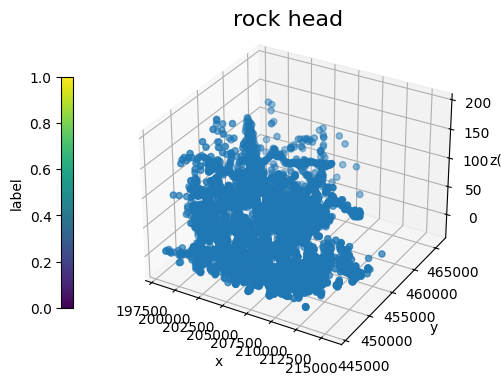

In [6]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

x=borehole_data['x 좌표']
y=borehole_data['y 좌표']
z=borehole_data['z 좌표']

map=ax.scatter(x,y,z, marker='o', s=20, cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z(m)')

plt.colorbar(map, label='label', shrink=0.5, location='left')

plt.suptitle('rock head',fontsize=16, x=0.6, y=0.8)

plt.show()

### 2. 학습, 평가
- 학습, 예측 데이터 split
- Decision Tree
- xgboost
- Random Forest
- SVM
- MLP
- stacking : logistic regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

- 학습, 예측 데이터 split

In [8]:
#origin data(X,Y)
X=borehole_data.iloc[:,[2,3]] #x좌표, y좌표
Y=borehole_data.iloc[:,10]
display(X.head(3))
display(Y.head(3))

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=150)

,x 좌표,y 좌표
0,202508.166948,445914.007345
1,202550.141173,445922.035045
2,210131.229153,445708.363176


0     98.3
1     97.8
2    105.3
Name: z 좌표, dtype: float64

- Decision Tree

In [9]:
#origin data
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_reg=DecisionTreeRegressor(random_state=150)
dt_parameters = {'max_depth': [5,7,10,13,16,19],
                 'min_samples_leaf':[3,6,9,12,15,18,21],
                 'criterion':['squared_error']
                }

grid_dt = GridSearchCV(dt_reg, param_grid = dt_parameters, cv = 5, scoring='neg_mean_squared_error')

grid_dt.fit(X_train,y_train)

best_params = grid_dt.best_params_     	  # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params)		  # 최상의 매개변수를 출력
best_score = np.sqrt(-grid_dt.best_score_)   # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력
y_pred = grid_dt.predict(X_test)    		  # 테스트 세트에 대한 예측
rmse_test = mean_squared_error(y_test, y_pred)**0.5    # 평균 제곱근 오차를 계산
print('테스트 점수: {:.3f}'.format(rmse_test))    # 테스트 세트 점수를 출력

최상의 매개변수: {'criterion': 'squared_error', 'max_depth': 19, 'min_samples_leaf': 3}
훈련 점수: 30.277
테스트 점수: 29.613


- XGBoost

In [10]:
#origin data
from xgboost import XGBRegressor

xgb_reg= XGBRegressor()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

grid_xgb=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring="neg_mean_squared_error", n_jobs=-1)
grid_xgb.fit(X_train,y_train)

best_params = grid_xgb.best_params_     	  # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params)		  # 최상의 매개변수를 출력
best_score = np.sqrt(-grid_xgb.best_score_)   # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력
y_pred = grid_xgb.predict(X_test)    		  # 테스트 세트에 대한 예측
rmse_test = mean_squared_error(y_test, y_pred)**0.5    # 평균 제곱근 오차를 계산
print('테스트 점수: {:.3f}'.format(rmse_test))    # 테스트 세트 점수를 출력

최상의 매개변수: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
훈련 점수: 35.953
테스트 점수: 35.558


- Random Forest

In [11]:
#origin data
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf_params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
grid_rf = GridSearchCV(rf_reg , param_grid=rf_params , cv=2, n_jobs=-1, scoring="neg_mean_squared_error")

grid_rf.fit(X_train, y_train)

best_params = grid_rf.best_params_     	  # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params)		  # 최상의 매개변수를 출력
best_score = np.sqrt(-grid_rf.best_score_)   # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력
y_pred = grid_rf.predict(X_test)    		  # 테스트 세트에 대한 예측
rmse_test = mean_squared_error(y_test, y_pred)**0.5    # 평균 제곱근 오차를 계산
print('테스트 점수: {:.3f}'.format(rmse_test))    # 테스트 세트 점수를 출력

최상의 매개변수: {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련 점수: 27.368
테스트 점수: 24.823


- SVM

In [12]:
#origin data
from sklearn.svm import SVR

svm_reg=SVR(kernel='rbf')
svm_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100,500,1000],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_reg, param_grid = svm_parameters, cv = 5, scoring='neg_mean_squared_error')

grid_svm.fit(X_train, y_train)

best_params = grid_svm.best_params_     	  # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params)		  # 최상의 매개변수를 출력
best_score = np.sqrt(-grid_svm.best_score_)   # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력
y_pred = grid_svm.predict(X_test)    		  # 테스트 세트에 대한 예측
rmse_test = mean_squared_error(y_test, y_pred)**0.5    # 평균 제곱근 오차를 계산
print('테스트 점수: {:.3f}'.format(rmse_test))    # 테스트 세트 점수를 출력

최상의 매개변수: {'C': 100, 'gamma': 0.001}
훈련 점수: 32.801
테스트 점수: 31.676


- MLP

In [13]:
#origin data
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor()

mlp_parameters={'hidden_layer_sizes': [i for i in range(4,25)],
              'activation': ['tanh'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]}

grid_mlp = GridSearchCV(mlp_reg, param_grid=mlp_parameters, scoring='neg_mean_squared_error')

grid_mlp.fit(X_train, y_train)

best_params = grid_mlp.best_params_     	  # 최상의 매개변수를 추출
print("최상의 매개변수:", best_params)		  # 최상의 매개변수를 출력
best_score = np.sqrt(-grid_mlp.best_score_)   # 최상의 점수를 계산
print("훈련 점수: {:.3f}".format(best_score))  # 최상의 점수를 출력
y_pred = grid_mlp.predict(X_test)    		  # 테스트 세트에 대한 예측
rmse_test = mean_squared_error(y_test, y_pred)**0.5    # 평균 제곱근 오차를 계산
print('테스트 점수: {:.3f}'.format(rmse_test))    # 테스트 세트 점수를 출력

최상의 매개변수: {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': 24, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}
훈련 점수: 40.412
테스트 점수: 40.144


- Stacking

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

estimators = [
     ('dt_reg', grid_dt),
     ('xgb_reg', grid_xgb),
     ('rf_reg', grid_rf),
     ('svm_reg', grid_svm),
     ('mlp_reg',grid_mlp)
]

stacking_reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators = 10, random_state = 42), cv=5)
stacking_reg.fit(X_train,y_train)
stacking_reg_pred=stacking_reg.predict(X_test)
print('stacking 모델의 테스트 점수: {0:.3f}'.format(mean_squared_error(y_test , stacking_reg_pred)))

stacking 모델의 테스트 점수: 676.397


In [15]:
from sklearn.ensemble import VotingRegressor

estimators = [
     ('dt_reg', grid_dt),
     ('xgb_reg', grid_xgb),
     ('rf_reg', grid_rf),
     ('svm_reg', grid_svm),
     ('mlp_reg',grid_mlp)
]
voting_reg = VotingRegressor(estimators=estimators)
voting_reg.fit(X_train,y_train)
voting_reg_pred=voting_reg.predict(X_test)
print('voting 모델의 테스트 점수: {0:.3f}'.format(mean_squared_error(y_test , voting_reg_pred)))

voting 모델의 테스트 점수: 798.548


### 2-1. 회귀 모델 평가
- MAE
- MAPE
- MSE
- RMSE
- R2 Score

In [19]:
# original
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

s_mae = mean_absolute_error(y_test, stacking_reg.predict(X_test))
s_mape = mean_absolute_percentage_error(y_test, stacking_reg.predict(X_test))
s_mse = mean_squared_error(y_test, stacking_reg.predict(X_test))
s_r2 = r2_score(y_test, stacking_reg.predict(X_test))

print('Stacking MAE: {0:.3f}'.format(s_mae))
print('Stacking MAPE: {0:.3f}'.format(s_mape))
print('Stacking MSE: {0:.3f}'.format(s_mse))
print('Stacking R2 Score: {0:.3f}'.format(s_r2))
print()

v_mae = mean_absolute_error(y_test, voting_reg.predict(X_test))
v_mape = mean_absolute_percentage_error(y_test, voting_reg.predict(X_test))
v_mse = mean_squared_error(y_test, voting_reg.predict(X_test))
v_r2 = r2_score(y_test, voting_reg.predict(X_test))

print('Voting MAE: {0:.3f}'.format(v_mae))
print('Voting MAPE: {0:.3f}'.format(v_mape))
print('Voting MSE: {0:.3f}'.format(v_mse))
print('Voting R2 Score: {0:.3f}'.format(v_r2))

Stacking MAE: 14.296
Stacking MAPE: 634457915751750.250
Stacking MSE: 676.397
Stacking R2 Score: 0.577

Voting MAE: 19.308
Voting MAPE: 608831247605798.750
Voting MSE: 798.548
Voting R2 Score: 0.500


### 3. 모델 시각화

In [17]:
import matplotlib.pyplot as plt

from matplotlib import cm

borehole_model_df=pd.DataFrame(columns=['좌표(x)','좌표(y)','층_표고'])

xmin=int(borehole_data['좌표(x)'].min())
xmax=int(borehole_data['좌표(x)'].max())
ymin=int(borehole_data['좌표(y)'].min())
ymax=int(borehole_data['좌표(y)'].max())
zmin=int(borehole_data['층_표고'].min())
zmax=int(borehole_data['층_표고'].max())

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(xmin, xmax, 1)
Y = np.arange(ymin, ymax, 1)
borehole_model_df['좌표(x)'] = X
borehole_model_df['좌표(y)'] = Y

Z_s = stacking_reg.predict(borehole_model_df[:, [0,1]])
Z_v = voting_reg.predict(borehole_model_df[:, [0,1]])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z_s, vmin=Z_s.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z_v, vmin=Z_v.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

KeyError: '좌표(x)'